# NYC Taxi Feature Exploration

Try to find the in-depth information behind the numbers

In [16]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
import string
import re, calendar, time, datetime
from datetime import datetime
from collections import Counter
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
import math          #for basic maths operations
import seaborn as sns #for making plots
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
# import os  # for os commands
# from scipy.misc import imread, imresize, imsave  # for plots 
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly
# from bokeh.palettes import Spectral4
# from bokeh.plotting import figure, output_notebook, show
# from IPython.display import HTML
# from matplotlib import animation
# import io
# import base64
# output_notebook()
# plotly.offline.init_notebook_mode() # run at the start of every ipython notebook

### Read in the training data and external data

In [3]:
s = time.time()
train_fr_1 = pd.read_csv('C:/Users/a1381/Desktop/UIUC/Python/Project/Taxi/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv')
train_fr_2 = pd.read_csv('C:/Users/a1381/Desktop/UIUC/Python/Project/Taxi/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv')
train_fr = pd.concat([train_fr_1, train_fr_2])
train_fr_new = train_fr[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
train_df = pd.read_csv('train.csv')
train = pd.merge(train_df, train_fr_new, on = 'id', how = 'left')
train_df = train.copy()
end = time.time()
print("Time taken by above cell is {}.".format((end-s)))
train_df.head()

Time taken by above cell is 25.648107051849365.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,140.1,5.0


In [4]:
train_fr.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


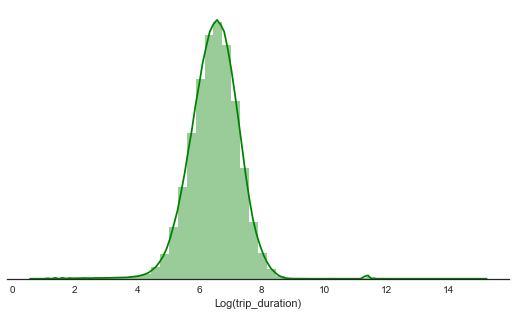

In [10]:
sns.set(style="white")
f, axes = plt.subplots(1, 1, figsize=(9, 5), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['trip_duration'].values+1), 
             axlabel = 'Log(trip_duration)', 
             label = 'log(trip_duration)', 
             bins = 50, 
             color="g")
plt.setp(axes, yticks=[])
end = time.time()
plt.show()

Great to make a copy for the following operation

In [11]:
train_data = train_df.copy()

# Feature Engineering

In [14]:
def haversine_(lat1, lng1, lat2, lng2):
    """
    function to calculate haversine distance between two co-ordinates
    input: array of lat and lng
    output: array of distance
    """
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """
    function to calculate manhatten distance between pick and drop coordinates
    input: array of lat and lng
    output: array of distance
    """
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

import math
def bearing_array(lat1, lng1, lat2, lng2):
    """ 
    Calculate the direction of two points
    input: array of lat and lng
    output: array of direction (degree)
    """
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

Extract features from time data and produce new features (distance and bearing)

In [15]:
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_month'] = train_data['pickup_datetime'].dt.month
train_data.loc[:, 'hour'] = train_data['pickup_datetime'].dt.hour
train_data.loc[:, 'week_of_year'] = train_data['pickup_datetime'].dt.weekofyear
train_data.loc[:, 'day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data.loc[:,'hvsine_pick_drop'] = haversine_(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)
train_data.loc[:,'manhtn_pick_drop'] = manhattan_distance_pd(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)
train_data.loc[:,'bearing'] = bearing_array(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)

Finding which instances starts or ends at airport

In [17]:
airport_df = train_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'hvsine_pick_drop']]

In [18]:
# airport_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] =\
# round(airport_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], 6)

In [19]:
airport_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,hvsine_pick_drop
0,-73.982155,40.767937,-73.964630,40.765602,1.498521
1,-73.980415,40.738564,-73.999481,40.731152,1.805507
2,-73.979027,40.763939,-74.005333,40.710087,6.385098
3,-74.010040,40.719971,-74.012268,40.706718,1.485498
4,-73.973053,40.793209,-73.972923,40.782520,1.188588


There are two airports near nyc and the coordinates for each airport are (40.6435529, -73.7821139), (40.7769271, -73.873965)

In [20]:
jkf_df = pd.DataFrame()
jkf_df['lat'] = [40.6435529] * len(train_data)
jkf_df['lon'] = [-73.7821139] * len(train_data)

airport_df['jkf_pick'] = haversine_(airport_df['pickup_latitude'].values, airport_df['pickup_longitude'].values,
                               jkf_df['lat'].values, jkf_df['lon'].values)
airport_df['jkf_drop'] = haversine_(airport_df['dropoff_latitude'].values, airport_df['dropoff_longitude'].values,
                               jkf_df['lat'].values, jkf_df['lon'].values)


lga_df = pd.DataFrame()
lga_df['lat'] = [40.7769271] * len(train_data)
lga_df['lon'] = [-73.873965] * len(train_data)

airport_df['lga_pick'] = haversine_(airport_df['pickup_latitude'].values, airport_df['pickup_longitude'].values,
                               lga_df['lat'].values, lga_df['lon'].values)
airport_df['lga_drop'] = haversine_(airport_df['dropoff_latitude'].values, airport_df['dropoff_longitude'].values,
                               lga_df['lat'].values, lga_df['lon'].values)

Set a threshold that the pick and drop location within 2 km from airport are related to airport

In [21]:
airport_index = airport_df[(airport_df.jkf_pick <= 2.0) | 
                               (airport_df.jkf_drop <= 2.0) | 
                               (airport_df.lga_pick <= 2.0) | 
                               (airport_df.lga_drop <= 2.0)].index

In [23]:
train_data['is_airport'] = 0
train_data.ix[airport_index, 'is_airport'] = 1
train_data['is_airport'].value_counts()

0    1361793
1      96851
Name: is_airport, dtype: int64

### Turn hours into cyclic

Let the mahine know that time is cyclic by using sine and cosine

For example, 1am are two hours later from 23pm, not 21 hours

In [24]:
def time_cyclic(df, column_name, base):
    df_ = df.copy()
    sin_name = 'sin_' + column_name
    cos_name = 'cos_' + column_name
    df_[sin_name] = np.sin(2*np.pi*df_[column_name]/base)
    df_[cos_name] = np.cos(2*np.pi*df_[column_name]/base)

    return df_ 

In [25]:
train_data = time_cyclic(train_data, 'hour', 24.)
train_data = time_cyclic(train_data, 'hour', 24.)

### PCA on lon & Lat

PCA can improve the performace when splitting trees

In [27]:
coords = np.vstack((train_data[['pickup_latitude', 'pickup_longitude']].values,
                    train_data[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)
train_data['pickup_pca0'] = pca.transform(train_data[['pickup_latitude', 'pickup_longitude']])[:, 0]
train_data['pickup_pca1'] = pca.transform(train_data[['pickup_latitude', 'pickup_longitude']])[:, 1]
train_data['dropoff_pca0'] = pca.transform(train_data[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
train_data['dropoff_pca1'] = pca.transform(train_data[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

### Fast speed

In [37]:
train_data['fast_speed'] = train_data['total_distance'] / train_data['total_travel_time']

### Count of turn, merge, fork, on_ramp

In [28]:
t = train_fr.copy()
t['step_maneuvers'] = t['step_maneuvers'].astype('str')
t['turn_count'] = t['step_maneuvers'].str.count('turn')
t['merge_count'] = t['step_maneuvers'].str.count('merge')
t['on_ramp_count'] = t['step_maneuvers'].str.count('on ramp')
t['fork_count'] = t['step_maneuvers'].str.count('fork')

In [31]:
train_data = pd.merge(train_data, t[['id', 'turn_count', 'merge_count', 'on_ramp_count', 'fork_count']], on = 'id', how = 'left')

### Cluster

In [32]:
from sklearn.cluster import MiniBatchKMeans, KMeans
# get lon & lat clustering for following avg location speed calculation
def get_clustering(df):
    # turn into this form [[lat, lon], [lat, lon], ....]
    coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,
                        df[['dropoff_latitude', 'dropoff_longitude']].values))
    df_ = df.copy()
    kmeans = MiniBatchKMeans(n_clusters=50, batch_size=3000).fit(coords)
    df_.loc[:, 'pickup_cluster'] = kmeans.predict(df_[['pickup_latitude', 'pickup_longitude']])
    df_.loc[:, 'dropoff_cluster'] = kmeans.predict(df_[['dropoff_latitude', 'dropoff_longitude']])
    return df_, kmeans

In [33]:
train_data, kmeans = get_clustering(train_data)

Cluster count

In [34]:
pick_cluster_count = train_data.groupby(['pickup_cluster']).agg(['size'])['id'].reset_index()
drop_cluster_count = train_data.groupby(['dropoff_cluster']).agg(['size'])['id'].reset_index()
pick_cluster_count = pick_cluster_count.rename(columns = {'size':'pick_cluster_count'})
drop_cluster_count = drop_cluster_count.rename(columns = {'size':'drop_cluster_count'})
train_data = pd.merge(left=train_data, right=pick_cluster_count, on='pickup_cluster')
train_data = pd.merge(left=train_data, right=drop_cluster_count, on='dropoff_cluster')

Cluster speed based on hour

In [38]:
pick_cluster_speed = train_data.groupby(['pickup_cluster', 'hour']).agg(['mean'])['fast_speed'].reset_index()
drop_cluster_speed = train_data.groupby(['dropoff_cluster', 'hour']).agg(['mean'])['fast_speed'].reset_index()
pick_cluster_speed = pick_cluster_speed.rename(columns = {'mean':'pick_cluster_speed'})
drop_cluster_speed = drop_cluster_speed.rename(columns = {'mean':'drop_cluster_speed'})
train_data = pd.merge(left=train_data, right=pick_cluster_speed, how='left', left_on=['pickup_cluster', 'hour'], right_on = ['pickup_cluster', 'hour'])
train_data = pd.merge(left=train_data, right=drop_cluster_speed, how='left', left_on=['dropoff_cluster', 'hour'], right_on = ['dropoff_cluster', 'hour'])

Cluster direction based on hour

In [39]:
pick_cluster_bearing = train_data.groupby(['pickup_cluster', 'hour']).agg(['median'])['bearing'].reset_index()
drop_cluster_bearing = train_data.groupby(['dropoff_cluster', 'hour']).agg(['median'])['bearing'].reset_index()
pick_cluster_bearing = pick_cluster_bearing.rename(columns = {'median':'pick_cluster_bearing'})
drop_cluster_bearing = drop_cluster_bearing.rename(columns = {'median':'drop_cluster_bearing'})
train_data = pd.merge(left=train_data, right=pick_cluster_bearing, how='left', left_on=['pickup_cluster', 'hour'], right_on = ['pickup_cluster', 'hour'])
train_data = pd.merge(left=train_data, right=drop_cluster_bearing, how='left', left_on=['dropoff_cluster', 'hour'], right_on = ['dropoff_cluster', 'hour'])

# Cleaning & Exploration

### Data with weird trip_duration and distance

The distance is zero but with more than 1 min trip_duration

In [40]:
train_data[(train_data.hvsine_pick_drop == 0.0) & (train_data.trip_duration >= 60)][['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'hvsine_pick_drop', 'trip_duration']].head()

,vendor_id,pickup_datetime,dropoff_datetime,hvsine_pick_drop,trip_duration
21472,2,2016-02-02 09:07:39,2016-02-02 09:28:35,0.0,1256
21474,1,2016-02-05 05:54:48,2016-02-05 06:03:43,0.0,535
21481,2,2016-02-01 18:38:18,2016-02-01 19:00:48,0.0,1350
21500,2,2016-03-24 18:28:28,2016-03-24 18:33:08,0.0,280
21534,1,2016-01-16 18:34:07,2016-01-16 18:36:29,0.0,142


In [41]:
Q_index = train_data[(train_data.hvsine_pick_drop == 0.0) & (train_data.trip_duration >= 60)][['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'hvsine_pick_drop', 'trip_duration']].index
Q_df = train_data[(train_data.hvsine_pick_drop == 0.0) & (train_data.trip_duration >= 60)][['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'hvsine_pick_drop', 'trip_duration']]

From the bar plot below, we can found that this kind of situation happedns more from vendor 2

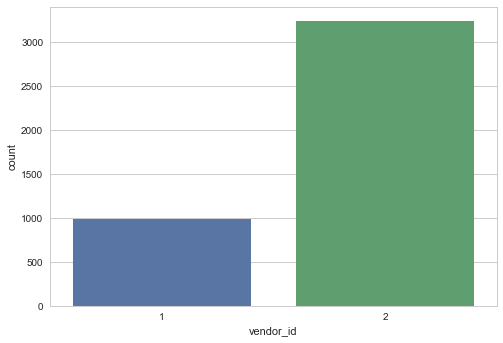

In [42]:
sns.set_style("whitegrid")
sns.countplot(x="vendor_id", data=Q_df)
plt.show()

In [43]:
train_data.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

From the stats, we can see that there are some data with extremely large trip duration

Set the threshold that the data with duration over 5 hours are weird

In [46]:
temp = train_data[train_data.trip_duration > 18000]
exetreme_duration_index = temp.index

In [45]:
temp[['trip_duration', 'pickup_datetime', 'dropoff_datetime']].head()

,trip_duration,pickup_datetime,dropoff_datetime
1157,85203,2016-03-29 12:47:07,2016-03-30 12:27:10
1502,84526,2016-05-06 20:02:50,2016-05-07 19:31:36
1560,85694,2016-06-23 20:01:17,2016-06-24 19:49:31
2356,84133,2016-04-04 08:38:54,2016-04-05 08:01:07
3102,86220,2016-03-20 21:57:08,2016-03-21 21:54:08


Almost all of this kind of situation are from vendor 2

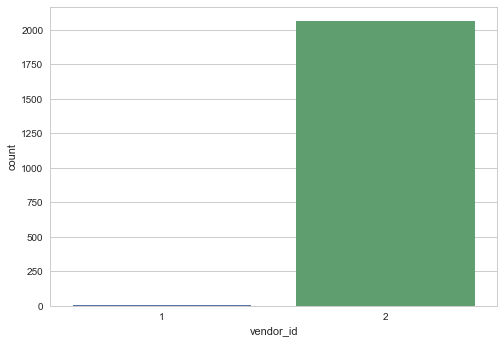

In [47]:
sns.set_style("whitegrid")
sns.countplot(x="vendor_id", data=temp)
plt.show()

### Speed

Not goona used in prediction

In [48]:
train_data['speed'] = 3600 * train_data['hvsine_pick_drop'] / train_data['trip_duration']

In [49]:
speed_df = train_data[['pickup_datetime', 'vendor_id', 'speed', 'day_of_week', 'hour']]
speed_df['date'] = speed_df['pickup_datetime'].dt.date

In [50]:
spped_v1 = speed_df[speed_df.vendor_id == 1]
spped_v2 = speed_df[speed_df.vendor_id == 2]

View the trend of speed from vendor 1, 2 based on day of week and hour

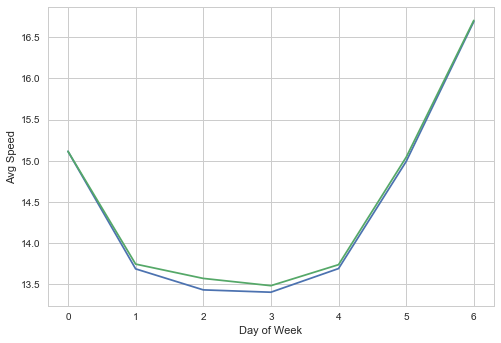

In [51]:
fig, ax =plt.subplots()
sns.set(style="whitegrid", palette="muted", color_codes=True)
ax.plot(spped_v1.groupby(['day_of_week']).agg('mean')['speed'])
ax.plot(spped_v2.groupby(['day_of_week']).agg('mean')['speed'])
plt.xlabel('Day of Week')
plt.ylabel('Avg Speed')

plt.show()

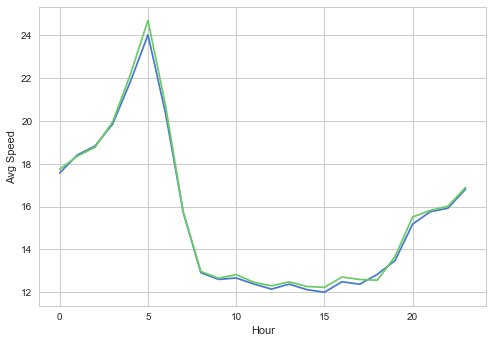

In [52]:
fig, ax =plt.subplots()
sns.set(style="whitegrid", palette="muted", color_codes=True)
ax.plot(spped_v1.groupby(['hour']).agg('mean')['speed'])
ax.plot(spped_v2.groupby(['hour']).agg('mean')['speed'])
plt.xlabel('Hour')
plt.ylabel('Avg Speed')
plt.show()

* The speed for two vendors are almost the same
* Taxi drivers drive faster in the morning and weekend which is reasonable

### Direction

In [66]:
direction_df = train_data[['id', 'vendor_id', 'bearing', 'speed', 'trip_duration', 'hvsine_pick_drop']]
direction_df.head()

,id,vendor_id,bearing,speed,trip_duration,hvsine_pick_drop
0,id2875421,2,99.970196,11.856428,455,1.498521
1,id3340818,2,91.658230,11.908076,534,1.766365
2,id3289253,2,88.987509,8.974554,737,1.837291
3,id1513064,1,67.029998,9.410722,685,1.790651
4,id1136399,2,86.439203,7.709139,674,1.443322


Time taken by above cell is 0.4376962184906006.


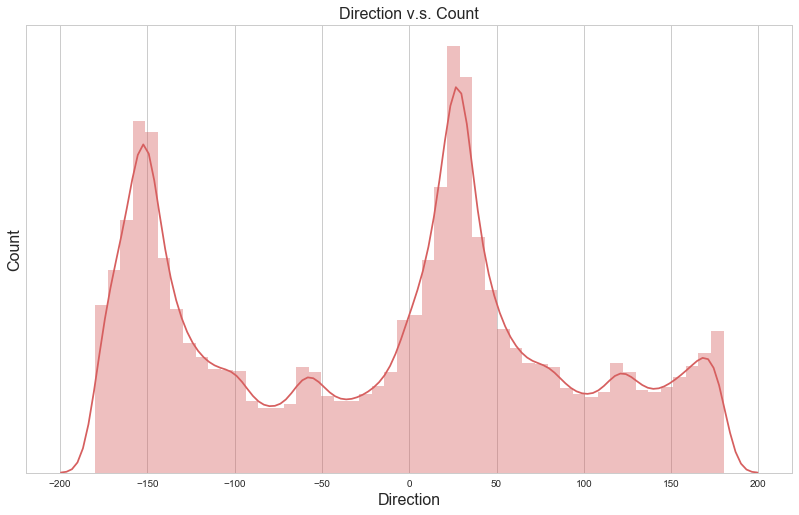

In [68]:
start = time.time()
sns.set(style="whitegrid", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
# sns.despine(left=True)
sns.distplot(direction_df['bearing'].values, 
             axlabel = 'Direction', 
             label = 'Direction', 
             bins = 50, 
             color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.title('Direction v.s. Count', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Direction', fontsize=16)
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

From the plot, we found that ther are two directions happens a lot which are similar to the shpape of midtown of nyc

Briefly look at distribution of avg speed based on directions

In [64]:
dir_temp = direction_df.groupby(['bearing']).agg(['mean'])['speed'].reset_index()
dir_temp.head()

,bearing,mean
0,-179.992701,23.780698
1,-179.992633,18.237851
2,-179.991787,17.869967
3,-179.991166,26.780186
4,-179.991119,8.195843


### Airport

In [50]:
temp_airport = train_data.groupby(['is_airport']).mean()[['trip_duration', 'speed', 'hvsine_pick_drop']].reset_index()
temp_airport[['trip_duration']] = temp_airport[['trip_duration']]/100 # rescale for the plot below
temp_airport

,is_airport,trip_duration,speed,hvsine_pick_drop
0,0,8.643407,13.685517,2.732271
1,1,22.973895,24.795682,13.404177


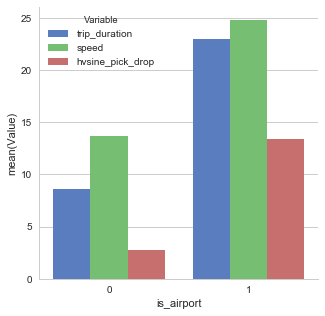

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
tidy = (
    temp_airport.set_index('is_airport')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
sns.barplot(x='is_airport', y='Value', hue='Variable', data=tidy, ax=ax)
sns.despine(fig)
plt.show()

From the plot above, we can find that trips starting or ending near airport have higher trip_duration, speed(high way), distance

### Weather

In [70]:
weather = pd.read_csv('weather_data_nyc_centralpark_2016.csv')
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [71]:
weather['DATE'] = pd.to_datetime(weather.date)
weather['pickup_date'] = weather['DATE'].dt.date
del weather['date']

In [73]:
train_data['pickup_date'] = train_data['pickup_datetime'].dt.date

In [74]:
train_data = pd.merge(train_data, weather, on = 'pickup_date', how = 'left')

  snow fall      speed
0         0  14.388556
1       0.0  14.364960
2       0.2  13.658217
3       0.4  16.670312
4       0.5  15.316081
5       1.4  17.154275
6       2.5  14.817374
7      27.3  13.350856
8         T  14.714882


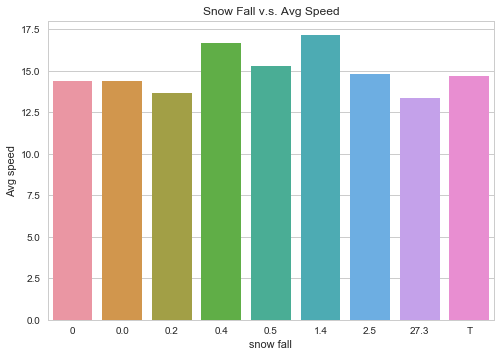

In [76]:
a = train_data.groupby(['snow fall']).mean()['speed'].reset_index()
print(a)
sns.barplot(x="snow fall", y='speed', data=a)
plt.xlabel('snow fall')
plt.ylabel('Avg speed')
plt.title('Snow Fall v.s. Avg Speed')
plt.show()

  snow fall  trip_duration
0         0     931.256312
1       0.0     973.658589
2       0.2     934.412834
3       0.4     906.369139
4       0.5     828.804774
5       1.4     813.655093
6       2.5     875.932462
7      27.3    1026.549757
8         T     899.071886


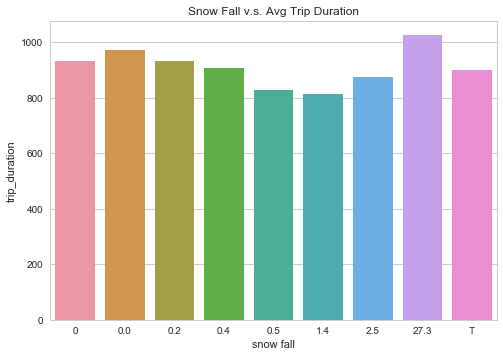

In [80]:
a = train_data.groupby(['snow fall']).mean()['trip_duration'].reset_index()
print(a)
sns.barplot(x="snow fall", y='trip_duration', data=a)
plt.xlabel('snow fall')
plt.ylabel('trip_duration')
plt.title('Snow Fall v.s. Avg Trip Duration')
plt.show()

  snow fall  hvsine_pick_drop
0         0          3.409441
1       0.0          3.452166
2       0.2          3.177476
3       0.4          3.549911
4       0.5          3.543680
5       1.4          3.475210
6       2.5          3.631223
7      27.3          3.163024
8         T          3.361860


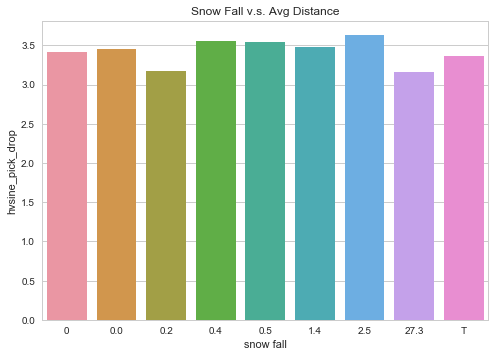

In [81]:
a = train_data.groupby(['snow fall']).mean()['hvsine_pick_drop'].reset_index()
print(a)
sns.barplot(x="snow fall", y='hvsine_pick_drop', data=a)
plt.xlabel('snow fall')
plt.ylabel('hvsine_pick_drop')
plt.title('Snow Fall v.s. Avg Distance')
plt.show()

It seems that snow or not does not impact the duration, trip, distance

### Explain the steep fall of count of trips

In [82]:
a = train_data.groupby('pickup_date').count()[['id']].reset_index()

In [83]:
lookup = {"snow fall": {"T": 0.01},
          "snow depth": {"T": 0.01},
          'precipitation': {"T": 0.01}}
train_data.replace(lookup, inplace=True)
train_data['snow fall'] = train_data['snow fall'].astype('float')
train_data['snow depth'] = train_data['snow depth'].astype('float')
train_data['precipitation'] = train_data['precipitation'].astype('float')

In [86]:
b = train_data
b['snow fall'] = b['snow fall'].astype('float')
bb = b.groupby(['pickup_date']).mean()['snow fall'].reset_index()
bb.columns = ['pickup_date', 'snow_fall']

In [87]:
c = train_data
c['snow depth'] = c['snow depth'].astype('float')
cc = c.groupby(['pickup_date']).mean()['snow depth'].reset_index()
cc.columns = ['pickup_date', 'snow_depth']

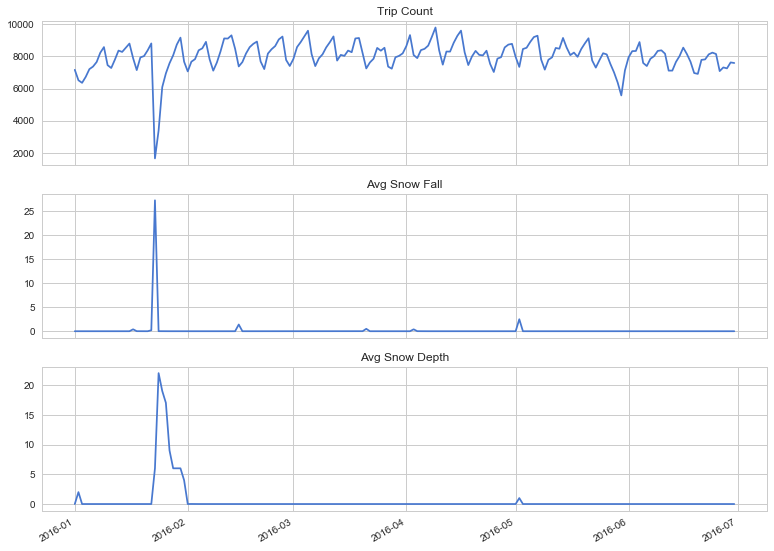

In [88]:
fig, ax = plt.subplots(figsize=(13, 10), nrows=3, sharex=True)
ax[0].plot(a.pickup_date,a.id)
ax[1].plot(bb.pickup_date, bb.snow_fall)
ax[2].plot(cc.pickup_date, cc.snow_depth)
# beautify the x-labels
plt.gcf().autofmt_xdate()
ax[0].set_title('Trip Count')
ax[1].set_title('Avg Snow Fall')
ax[2].set_title('Avg Snow Depth' ,rotation=0)
plt.show()

We found that around 2016-02 there is a deep drop on number of taxi ride which may be caused by snowing

### Step

In [89]:
step_df = train_data.groupby('number_of_steps').mean()[['trip_duration', 'speed']].reset_index()

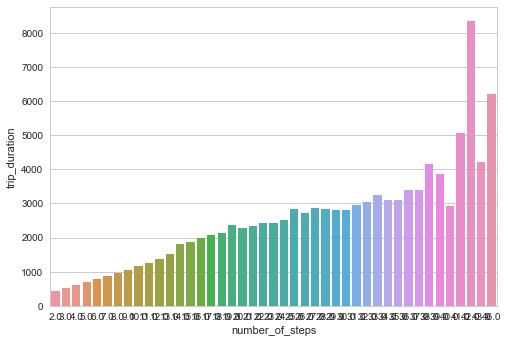

In [90]:
sns.barplot(x="number_of_steps", y='trip_duration', data=step_df)
plt.xlabel('number_of_steps')
plt.ylabel('trip_duration')
plt.show()

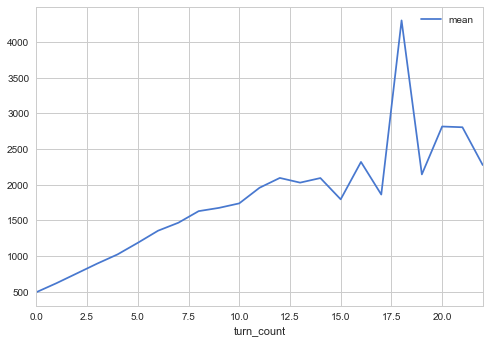

In [95]:
train_data.groupby(['turn_count']).agg(['mean'])['trip_duration'].plot()
plt.show()

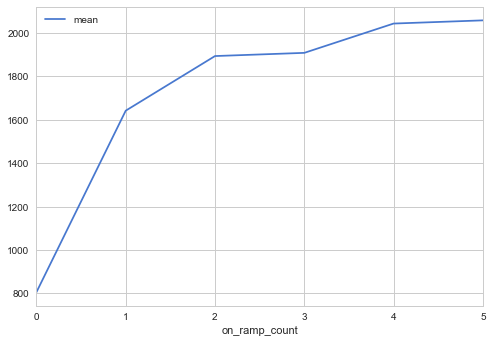

In [93]:
train_data.groupby(['on_ramp_count']).agg(['mean'])['trip_duration'].plot()
plt.show()

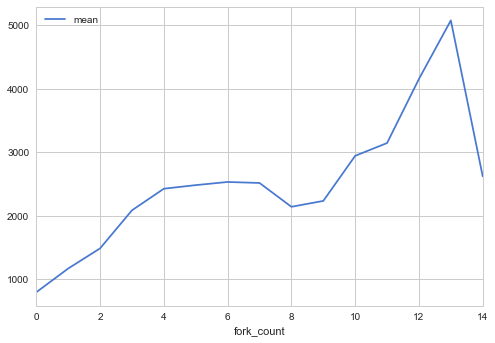

In [94]:
train_data.groupby(['fork_count']).agg(['mean'])['trip_duration'].plot()
plt.show()

It seems that the trip duration increase as the count of fork, turn, on_ramp increase. But there are some extremely changes which need to be checked

### Map

Use kmeans to find the cluster based on lat, lng

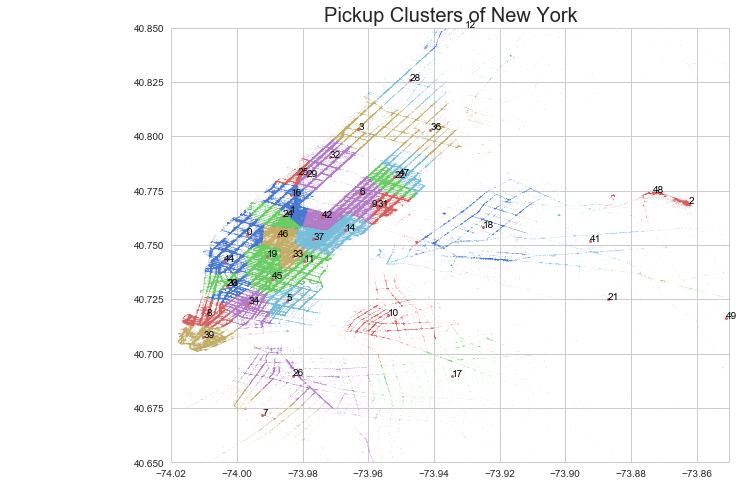

In [96]:
fig,ax = plt.subplots(figsize = (10,8))
for label in train_data.pickup_cluster.unique():
    ax.plot(train_data.pickup_longitude[train_data.pickup_cluster == label],
            train_data.pickup_latitude[train_data.pickup_cluster == label],
            '.', 
            alpha = 0.9, 
            markersize = 0.5)
    ax.plot(kmeans.cluster_centers_[label,1],kmeans.cluster_centers_[label,0],'o', color = 'r', markersize = 3)
    ax.annotate(label, (kmeans.cluster_centers_[label,1],kmeans.cluster_centers_[label,0]), color = 'black', fontsize = 10)
ax.set_facecolor('white')
plt.title('Pickup Clusters of New York',fontsize=20)
plt.xlim(-74.02,-73.85)
plt.ylim(40.65,40.85)
plt.show()